# Clase 4 — Funciones, NumPy, Pandas aplicado y gráficos

## Objetivos
1. Encapsular código en **funciones reutilizables**.
2. Entender **NumPy** como base del cálculo numérico en Python.
3. Usar **pandas** de forma más estructurada (pipeline de datos).
4. Crear **gráficos simples** para explorar datos.
5. Entender por qué este flujo es el que usaremos en la siguiente tarea.

Hoy pasamos de “scripts sueltos” a **estructura de proyecto**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Funciones

Hasta ahora hemos escrito código “lineal”.
Cuando el mismo patrón aparece varias veces, **debemos usar funciones**.

### ¿Para qué sirven?
- Evitan copiar/pegar
- Hacen el código más claro
- Facilitan cambios futuros
- Son clave para proyectos reales



In [2]:
def add_tax(amount, tax_rate=0.18):
    """
    Devuelve el monto con impuesto.
    """
    return amount * (1 + tax_rate)

add_tax(100)

118.0

## print vs return

- `print()` muestra algo en pantalla
- `return` devuelve un valor al programa

👉 Si lo necesitas después, usa `return`.


In [3]:
def bad_square(x):
    print(x * x)

def good_square(x):
    return x * x

a = bad_square(3)
b = good_square(3)

print("a:", a)
print("b:", b)


9
a: None
b: 9


## Scope

Las variables dentro de una función **no existen fuera** de ella,
a menos que las retornes.

In [4]:
x = 10

def f():
    x = 5
    return x

print(x)
print(f())
print(x)


10
5
10


# 2. NumPy

NumPy permite trabajar con **arrays** y hacer operaciones
**vectorizadas** (sin loops explícitos).

Hoy veremos:
- crear arrays
- slicing
- operaciones vectorizadas
- estadísticas básicas


In [5]:
a = np.array([10, 20, 30, 40])
a


array([10, 20, 30, 40])

In [6]:
a * 2


array([20, 40, 60, 80])

In [7]:
# Matrices
M = np.array([[1, 2, 3],
              [4, 5, 6]])

M


array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
M.shape

(2, 3)

In [11]:
# Slicing
print(a[1:3])
print(M[0, 1])
M[1, :]
M[:, 2]

[20 30]
2


array([3, 6])

In [13]:
# Estadisticos basicos
a.mean(), a.sum(), a.std()


(25.0, 100, 11.180339887498949)

In [14]:
M.mean(), M.sum(), M.std()

(3.5, 21, 1.707825127659933)

## Condiciones vectorizadas

En Python “básico”, cuando queremos aplicar una condición a muchos valores,
normalmente usaríamos un `for`:

```python
result = []
for x in a:
    if x >= 25:
        result.append("alto")
    else:
        result.append("bajo")

Con NumPy, esto se puede hacer de forma vectorizada:

In [15]:
np.where(a >= 25, "alto", "bajo")


array(['bajo', 'bajo', 'alto', 'alto'], dtype='<U4')

¿Qué está pasando aquí?

a >= 25 produce un array de True/False

np.where(condición, valor_si_True, valor_si_False)
elige el valor correspondiente para cada elemento del array

¿Por qué es importante?

Es más corto

Es más legible

Es mucho más rápido que usar loops

Es la forma estándar en NumPy y pandas

# 3. Pandas + Funciones

Usaremos un dataset real del paper  
*“Michelin Is Coming to Town: Organizational Responses to Status Shocks”*.

Este dataset representa información a nivel de restaurante y tiempo.
No nos interesa entender el paper hoy, sino **aprender a trabajar con datos reales**.


In [23]:
sns.set(style="whitegrid")

In [25]:
df = pd.read_csv("Stata_Main.csv")
df.head()

,id_n,restaurant_name,restaurant_yelp_price,restaurant_yelp_pricelevel,restaurant_yelp_cuisine,restaurant_main_cuisine,restaurant_address,restaurant_year_opened,restaurant_age,restaurant_yelp_av_rating,...,guide_dummy,menu_year2017,best_out_dc,control_1,trend_dc,trend_boston,price_matched,priorstanding,priorstanding_vs_control1,priorstanding_vs_control2
0,1,Alden & Harlow,$$$,3,"American (Traditional), Breakfast & Brunch",American (Traditional),"40 Brattle St Cambridge, MA 02138",2014,4,3.982,...,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,Alden & Harlow,$$$,3,"American (Traditional), Breakfast & Brunch",American (Traditional),"40 Brattle St Cambridge, MA 02138",2014,4,3.986,...,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,Bergamot,$$$,3,"American (New), Cocktail Bars, Wine Bars",American (New),"118 Beacon St Somerville, MA 02143",2010,8,4.000,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,Bergamot,$$$,3,"American (New), Cocktail Bars, Wine Bars",American (New),"118 Beacon St Somerville, MA 02143",2010,8,4.500,...,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,Erbaluce,$$$,3,Italian,Italian,"69 Church St Boston, MA 02116",2008,10,4.500,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## 3.2 Explorar antes de analizar

Antes de hacer cualquier análisis, debemos entender:
- qué columnas existen
- qué tipos de datos tienen
- si hay valores faltantes


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_n                        618 non-null    int64  
 1   restaurant_name             618 non-null    object 
 2   restaurant_yelp_price       600 non-null    object 
 3   restaurant_yelp_pricelevel  618 non-null    int64  
 4   restaurant_yelp_cuisine     618 non-null    object 
 5   restaurant_main_cuisine     618 non-null    object 
 6   restaurant_address          598 non-null    object 
 7   restaurant_year_opened      618 non-null    int64  
 8   restaurant_age              618 non-null    int64  
 9   restaurant_yelp_av_rating   591 non-null    float64
 10  menu_year                   618 non-null    int64  
 11  menu_n_dishes               618 non-null    int64  
 12  menu_descr_length           618 non-null    float64
 13  menu_descr_size             618 non

In [27]:
df.describe()


,id_n,restaurant_yelp_pricelevel,restaurant_year_opened,restaurant_age,restaurant_yelp_av_rating,menu_year,menu_n_dishes,menu_descr_length,menu_descr_size,menu_craft_auth,...,guide_dummy,menu_year2017,best_out_dc,control_1,trend_dc,trend_boston,price_matched,priorstanding,priorstanding_vs_control1,priorstanding_vs_control2
count,618.000000,618.000000,618.000000,618.000000,591.000000,618.000000,618.000000,618.000000,618.000000,618.000000,...,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,216.514563,2.394822,2010.118123,7.881877,3.811558,2016.500000,42.658576,13.214078,0.028932,0.084660,...,0.537217,0.500000,0.064725,0.462783,0.080906,0.071197,0.987055,0.145631,0.608414,0.414239
std,138.701938,0.602081,3.830352,3.830352,0.337729,0.500405,27.669354,4.813613,0.058108,0.092841,...,0.499017,0.500405,0.246239,0.499017,0.272912,0.257363,0.113129,0.353022,0.488500,0.492989
min,1.000000,2.000000,2004.000000,2.000000,2.925000,2016.000000,2.000000,2.730000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2.000000,2006.000000,4.000000,3.573500,2016.000000,24.000000,10.075000,0.000000,0.012500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,196.000000,2.000000,2010.000000,8.000000,3.841000,2016.500000,36.000000,12.685000,0.000000,0.050000,...,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,333.000000,3.000000,2014.000000,12.000000,4.058500,2017.000000,53.000000,15.807500,0.040000,0.130000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,475.000000,4.000000,2016.000000,14.000000,4.522000,2017.000000,169.000000,37.040001,1.000000,0.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df[["restaurant_year_opened", "michelin_rank"]].head()


,restaurant_year_opened,michelin_rank
0,2014,4
1,2014,4
2,2010,4
3,2010,4
4,2008,4


In [31]:
df_2015 = df[df["restaurant_year_opened"] == 2015]
df_2015.head()


,id_n,restaurant_name,restaurant_yelp_price,restaurant_yelp_pricelevel,restaurant_yelp_cuisine,restaurant_main_cuisine,restaurant_address,restaurant_year_opened,restaurant_age,restaurant_yelp_av_rating,...,guide_dummy,menu_year2017,best_out_dc,control_1,trend_dc,trend_boston,price_matched,priorstanding,priorstanding_vs_control1,priorstanding_vs_control2
30,21,Ma Maison,$$,2,"French, Cocktail Bars, Wine Bars",French,"272 Cambridge St Boston, MA 02114",2015,3,4.154,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
31,21,Ma Maison,$$,2,"French, Cocktail Bars, Wine Bars",French,"272 Cambridge St Boston, MA 02114",2015,3,4.308,...,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
36,24,Select Oyster Bar,$$$,3,"Seafood, Bars",Seafood,"50 Gloucester St Boston, MA 02115",2015,3,3.621,...,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
37,24,Select Oyster Bar,$$$,3,"Seafood, Bars",Seafood,"50 Gloucester St Boston, MA 02115",2015,3,3.710,...,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
42,29,Tiger Mama,$$$,3,"Thai, Vietnamese, Bars",Thai,"1363 Boylston St Boston, MA 02215",2015,3,3.585,...,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [32]:
df_high_rating = df[df["michelin_rank"] >= 3]
df_high_rating.head()


,id_n,restaurant_name,restaurant_yelp_price,restaurant_yelp_pricelevel,restaurant_yelp_cuisine,restaurant_main_cuisine,restaurant_address,restaurant_year_opened,restaurant_age,restaurant_yelp_av_rating,...,guide_dummy,menu_year2017,best_out_dc,control_1,trend_dc,trend_boston,price_matched,priorstanding,priorstanding_vs_control1,priorstanding_vs_control2
0,1,Alden & Harlow,$$$,3,"American (Traditional), Breakfast & Brunch",American (Traditional),"40 Brattle St Cambridge, MA 02138",2014,4,3.982,...,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,Alden & Harlow,$$$,3,"American (Traditional), Breakfast & Brunch",American (Traditional),"40 Brattle St Cambridge, MA 02138",2014,4,3.986,...,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,Bergamot,$$$,3,"American (New), Cocktail Bars, Wine Bars",American (New),"118 Beacon St Somerville, MA 02143",2010,8,4.000,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,Bergamot,$$$,3,"American (New), Cocktail Bars, Wine Bars",American (New),"118 Beacon St Somerville, MA 02143",2010,8,4.500,...,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,Erbaluce,$$$,3,Italian,Italian,"69 Church St Boston, MA 02116",2008,10,4.500,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df["high_rating"] = df["michelin_rank"] >= 3
df[["michelin_rank", "high_rating"]].head(20)
# Esto es vectorizado: se aplica a todas las filas a la vez.

,michelin_rank,high_rating
0,4,True
1,4,True
2,4,True
3,4,True
4,4,True
5,4,True
6,4,True
7,4,True
8,4,True
9,4,True


In [35]:
df["michelin_rank"].value_counts()

michelin_rank
1    286
2    236
3     64
4     32
Name: count, dtype: int64

In [39]:
df.groupby("restaurant_yelp_price")["restaurant_yelp_av_rating"].agg(["count", "mean", "std"])


,count,mean,std
restaurant_yelp_price,,,
$,2,3.896500,0.041719
$$,393,3.742888,0.317810
$$$,143,3.942385,0.343515
$$$$,36,4.112889,0.207478


In [45]:
summary_year = df.groupby("restaurant_year_opened")["restaurant_yelp_av_rating"].agg(["count", "mean"]).reset_index()
summary_year.to_csv("summary_rating_by_year.csv", index=False)


In [46]:
print(summary_year)

    restaurant_year_opened  count      mean
0                     2004      5  3.815000
1                     2005     60  3.812167
2                     2006    123  3.690935
3                     2007     36  3.784833
4                     2008     26  3.715885
5                     2009     31  3.751129
6                     2010     26  3.883923
7                     2011     46  3.780326
8                     2012     33  3.943030
9                     2013     48  3.902667
10                    2014     57  3.782649
11                    2015     66  3.895818
12                    2016     34  4.018500


## 4. Gráficos con plt y seaborn

Los gráficos sirven para:
- detectar patrones
- detectar errores
- comunicar resultados

Nunca analizamos datos sin **al menos un gráfico**.


## Librerías para hacer gráficos en Python

Hasta ahora analizamos datos con tablas (pandas).  
El siguiente paso natural es **visualizar los datos**.

En Python, las dos librerías más usadas para gráficos son:

### `matplotlib`
- Es la librería base para gráficos en Python.
- Da mucho control sobre el gráfico.
- Un poco más “manual”, pero muy estándar.

### `seaborn'

Está construida sobre matplotlib.

Hace gráficos más “bonitos” y más rápidos para datos tabulares.

Funciona muy bien con pandas.

### Regla mínima para cualquier gráfico

Todo gráfico debe tener:

un título,

ejes etiquetados,

y representar claramente qué se está mostrando.

| Librería     | ¿Para qué se usa?                         | Cuándo usarla                         |
|-------------|-------------------------------------------|---------------------------------------|
| matplotlib  | Gráficos básicos y control total           | Líneas, histogramas, gráficos simples |
| seaborn     | Gráficos estadísticos y categóricos        | Barras, boxplots, comparaciones        |


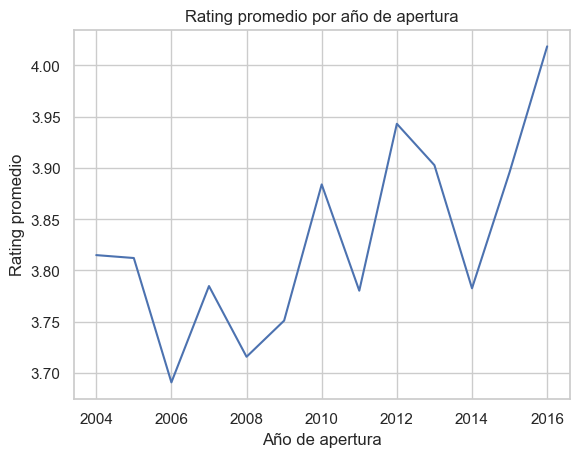

In [47]:
plt.figure()
plt.plot(summary_year["restaurant_year_opened"], summary_year["mean"])
plt.title("Rating promedio por año de apertura")
plt.xlabel("Año de apertura")
plt.ylabel("Rating promedio")
plt.show()


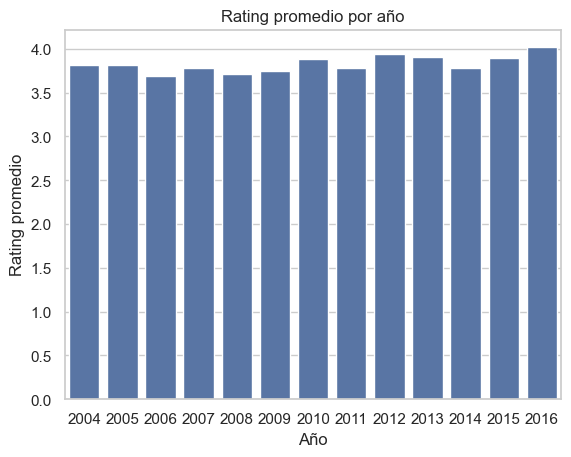

In [49]:
plt.figure()
sns.barplot(data=summary_year, x="restaurant_year_opened", y="mean")
plt.title("Rating promedio por año")
plt.xlabel("Año")
plt.ylabel("Rating promedio")
plt.show()


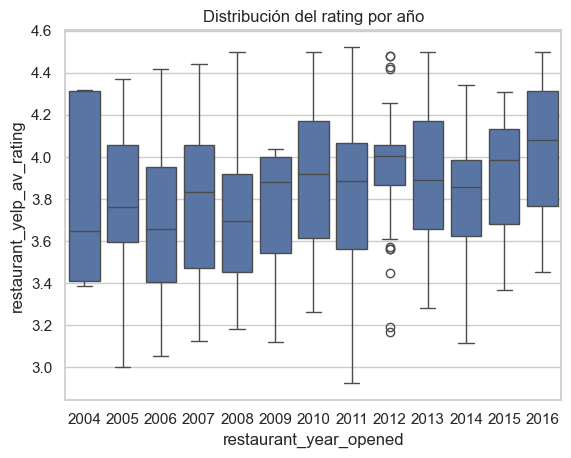

In [50]:
# Boxplot
plt.figure()
sns.boxplot(data=df, x="restaurant_year_opened", y="restaurant_yelp_av_rating")
plt.title("Distribución del rating por año")
plt.show()


## 5. Con funciones


In [ ]:
def summarize_rating_by_year(df):
    return (
        df.groupby("restaurant_year_opened")["restaurant_yelp_av_rating"]
          .agg(["count", "mean", "std"])
          .reset_index()
    )

summary2 = summarize_rating_by_year(df)
summary2.head()
# esto es muy importante cuando tenemos que repetir un análisis varias veces.

,restaurant_year_opened,count,mean,std
0,2004,5,3.815000,0.467748
1,2005,60,3.812167,0.292579
2,2006,123,3.690935,0.356692
3,2007,36,3.784833,0.366687
4,2008,26,3.715885,0.376491


# Clases: organizar datos y funciones juntos

Hasta ahora hemos usado:
- **variables** para guardar datos
- **funciones** para reutilizar lógica

A veces, esos dos elementos van naturalmente juntos.
Para eso existen las **clases**.

Una clase es una forma de **agrupar datos y funciones relacionadas**.

## ¿Cuándo tiene sentido usar una clase?

No siempre necesitas clases.

Tiene sentido usar una clase cuando:
- trabajas con un “objeto” claro (pedido, usuario, dataset, modelo)
- ese objeto tiene **datos propios**
- y **acciones** que se aplican sobre esos datos

Hoy veremos un ejemplo muy simple.

## La idea básica (sin código)

Piensa en un *dataset*:
- tiene un archivo (ruta)
- tiene datos cargados
- podemos limpiarlos
- podemos resumirlos

En lugar de pasar el DataFrame a muchas funciones,
podemos **guardar todo junto**.



In [52]:
class Dataset:
    pass
